# 💳 Credit Card Fraud Detection
## 📌 Introduction

Credit card fraud is a major concern in the financial industry, costing billions of dollars every year. Detecting fraudulent transactions is a challenging task because:

- ⚖️ The dataset is highly imbalanced (fraud cases are much fewer than normal cases).

- 🔎 Fraudulent transactions often mimic normal behavior, making them harder to identify.

- ⏱️ Real-time detection requires models that are both accurate and efficient.

In this notebook, I will:

- Explore and preprocess the dataset.

- Handle the issue of class imbalance.

- Apply machine learning models (such as Logistic Regression, Random Forest, etc.).

- Evaluate model performance using metrics beyond simple accuracy (Precision, Recall, F1-score).

## 🎯 Goal

The goal is not only to build a working fraud detection model, but also to understand the reasoning behind each step. This notebook serves both as a learning project and as a portfolio piece to demonstrate my progress in data science.

### 1. Importing all the necessary Libraries.

In [ ]:
# Import the necessary packages.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

### 2. Loading the Data.

In [ ]:
# Load the dataset from the csv file using pandas.
data = pd.read_csv("/content/creditcard.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

The Credit Card Fraud Detection dataset contains 284,807 transactions with 31 features. All columns are of type float64, and there are no missing values. The dataset has likely been preprocessed and encoded, as there are no string-type columns. Each row represents a single credit card transaction.

In [ ]:
# Grab a peek at the data.
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Principal Component Analysis (PCA) is the most popular dimensionality reduction algorithm to date. It first determines the hyperplane located closest to the data, then projects the data points onto that hyperplane.

### 3. Describing the Data.

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


A call to data.describe() provides a statistical overview of the dataset's numerical features. Since all columns are of type float64, it includes measures such as count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile), 75th percentile (Q3), and maximum for each feature. This summary helps understand the distribution, scale, and potential outliers in the dataset before applying any machine learning models.

In [ ]:
print("Amount details of the fraudulent transaction")
data.Amount.describe()
# The largest fraud amount is 25691$
# The smallest fraud amount is 0 (maybe this time it failed)

Amount details of the fraudulent transaction


,Amount
count,284807.000000
mean,88.349619
std,250.120109
min,0.000000
25%,5.600000
50%,22.000000
75%,77.165000
max,25691.160000


### 4. Visualize data.

In [ ]:
# Create the Group column based on the Class column so as not to affect model training.
# Before mapping
data['Group'] = data['Class']
data['Group']

,Group
0,0
1,0
2,0
3,0
4,0
...,...
284802,0
284803,0
284804,0
284805,0


In [ ]:
# Mapping 0 -> "normal data", 1 -> "fraud data"
data['Group'] = data['Group'].map({0: 'normal', 1: 'fraud'})

In [ ]:
# After mapping
data['Group'].head()

,Group
0,normal
1,normal
2,normal
3,normal
4,normal


In [ ]:
freq = data.groupby(['Group'])['Group'].count()
freq

,Group
Group,
fraud,492
normal,284315


The code calculates the frequency of each category in the Group column. This shows how many transactions are labeled as "normal data" and how many are labeled as "fraud data". It helps us understand the class distribution, which is important because fraud detection datasets are often highly imbalanced.


The frequency check shows that the dataset is highly imbalanced. There are 284,315 normal transactions compared to only 492 fraudulent transactions. This imbalance highlights the challenge of credit card fraud detection, as the fraudulent class represents less than 0.2% of the data.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting with Seaborn
sns.set_theme(style="darkgrid")

def plot_percentage_countplot(data, x, hue):
    total = float(len(data))

    ax = sns.countplot(x=x, hue=hue, data=data, palette = sns.color_palette("bright") , stat="count")
    ax.set_ylabel("Transactions")

    for p in ax.patches:
        height = p.get_height()
        if height > 0:
          ax.text(p.get_x() + p.get_width() / 2.,
                  height / 2 + p.get_y(),
                  '{:.2f}%'.format((height / total) * 100),
                  ha="center",
                  color="black",
                  fontsize=20)

    plt.show()

/tmp/ipython-input-466857479.py:10: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(x=x, hue=hue, data=data, palette = sns.color_palette("bright") , stat="count")


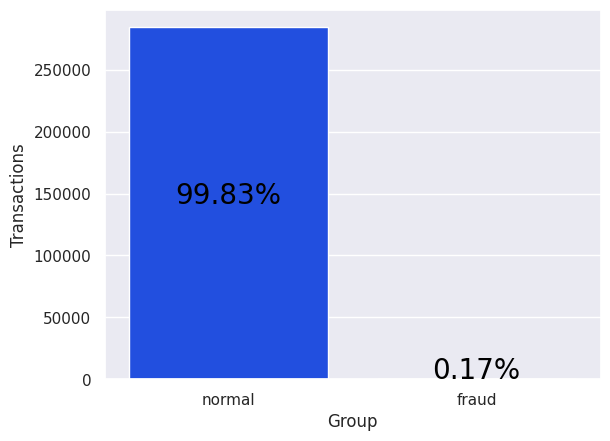

In [ ]:
plot_percentage_countplot(data=data, x='Group', hue='Group')

As you can see in the chart the data is too unbalanced, it is skewed to one side.

### 4.1. Imbalanced data.

In [ ]:
# Determine number of fraud cases in dataset.
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
total = data[data['Class'] == 1] + data[data['Class'] == 0]

fraudrate = round(100*len(fraud)/float(len(valid) + len(fraud)),4)
print('Fraud Rate',fraudrate)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))
print('Total Transactions: {}'.format(len(total)))

Fraud Rate 0.1727
Fraud Cases: 492
Valid Transactions: 284315
Total Transactions: 284807


Only 0.17% of all transactions are fraudulent, while the vast majority are normal. This can cause the model to "learn" a strategy that always predicts normal in order to achieve high accuracy, but it would fail to detect fraud.

### 5. Plotting the Correlation Matrix.

Do you know that if you want to have an overview about the correlation between variables with each other, you can use a correlation matrix to display it?

**Why do we need to know Correlation?**

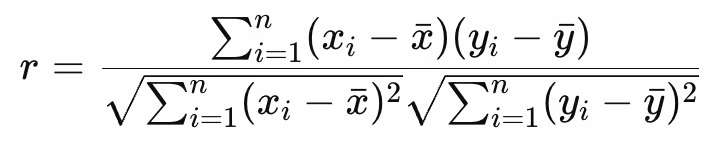

Correlation measures the strength and direction of a linear relationship between two quantitative variables. It helps us understand how changes in one variable are associated with changes in another.

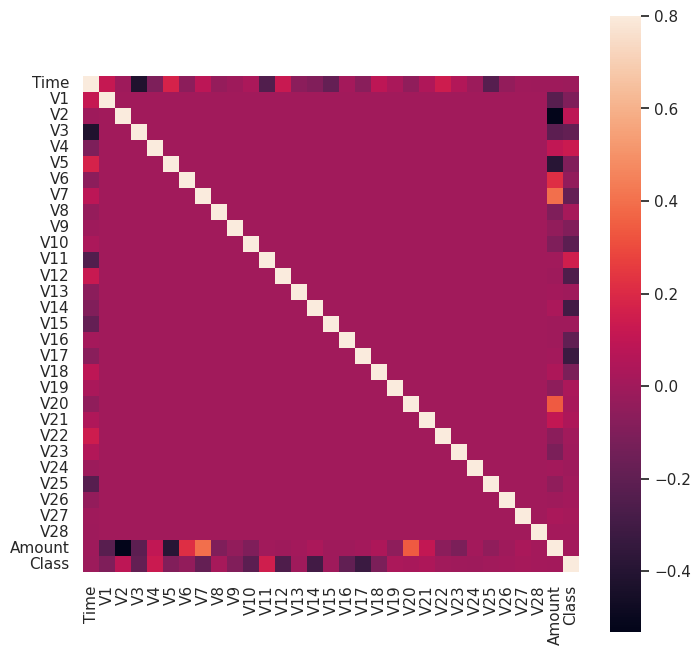

In [ ]:
# Correlation matrix.
# Drop the 'Group' column as it contains string values and cannot be used for correlation calculation.
corrmat = data.drop('Group', axis=1).corr()
fig = plt.figure(figsize = (8, 8))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In this heatmap, we can see that V2 and V5 have a very strong negative correlation with Amount, which means that as V2 and V5 increase, the Amount tends to decrease. Conversely, there is a positive correlation between V20 and Amount, so as V20 increases, the Amount also tends to increase.

Assume that V2 and V5 are indicators of transaction security; V2 could represent the use of a chip and PIN, and V5 could represent two-factor authentication. When transaction security increases (the values of V2 and V5 are high), the fraud amount tends to decrease. This is because highly secure transactions are much harder for fraudsters to compromise, especially for large sums of money.

Conversely, there's a strong positive correlation between V20 and Amount. In this context, V20 could represent the number of international transactions or the average transaction value.

This positive correlation is logical because when the value of V20 increases (meaning the customer makes more international or high-value transactions), the fraud amount also increases. Transactions that are high-value or cross-border often carry more risk and are more likely to be targeted by criminals, leading to higher financial losses when fraud occurs.

### 6. Separating the X and the Y values.

**6.1. Split the original data**

We spend 80% of the data set to train the learning model and keep 20% for testing, this 20% of data will not be revealed, not peeked for the purpose of seeing how well the model works.

In [ ]:
from sklearn.model_selection import train_test_split
# Split the original data into a full-scale training set and an untouched testing set
# 'Class' is the target variable
xData_original = data.drop(['Class','Group'], axis=1)
yData_original = data['Class']

# Stratify ensures that the proportion of 'fraud' cases is the same in both splits
xTrain, xTest, yTrain, yTest = train_test_split(xData_original, yData_original, test_size=0.2, random_state=42, stratify=yData_original)

In [ ]:
xData_original = xData_original.values
xData_original

array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02, ...,
         1.33558377e-01, -2.10530535e-02,  1.49620000e+02],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
        -8.98309914e-03,  1.47241692e-02,  2.69000000e+00],
       [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
        -5.53527940e-02, -5.97518406e-02,  3.78660000e+02],
       ...,
       [ 1.72788000e+05,  1.91956501e+00, -3.01253846e-01, ...,
         4.45477214e-03, -2.65608286e-02,  6.78800000e+01],
       [ 1.72788000e+05, -2.40440050e-01,  5.30482513e-01, ...,
         1.08820735e-01,  1.04532821e-01,  1.00000000e+01],
       [ 1.72792000e+05, -5.33412522e-01, -1.89733337e-01, ...,
        -2.41530880e-03,  1.36489143e-02,  2.17000000e+02]])

In [ ]:
xData_original.shape

(284807, 30)

In [ ]:
yData_original = yData_original.values
yData_original

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
yData_original.shape

(284807,)

**6.2. Downsampling**

In [ ]:
# Downsample the training set to create a balanced subset
# Separate the fraudulent and non-fraudulent cases in the training set
xTrain_fraud = xTrain[yTrain == 1]
yTrain_fraud = yTrain[yTrain == 1]

xTrain_normal = xTrain[yTrain == 0]
yTrain_normal = yTrain[yTrain == 0]

# Convert NumPy arrays to pandas DataFrames to use the sample method
xTrain_normal_df = pd.DataFrame(xTrain_normal)
yTrain_normal_df = pd.DataFrame(yTrain_normal)


# Downsample the non-fraudulent cases to match the number of fraudulent cases
xTrain_normal_downsampled = xTrain_normal_df.sample(n=len(xTrain_fraud), random_state=42)
yTrain_normal_downsampled = yTrain_normal_df.sample(n=len(yTrain_fraud), random_state=42)


# Concatenate the downsampled subsets to create the final balanced training data
xTrain_balanced = pd.concat([pd.DataFrame(xTrain_fraud), xTrain_normal_downsampled], axis=0)
yTrain_balanced = pd.concat([pd.DataFrame(yTrain_fraud), yTrain_normal_downsampled], axis=0)

In [ ]:
# Combine downsampled data into a single DataFrame for plotting
balanced_data = pd.concat([xTrain_balanced, yTrain_balanced], axis=1)
balanced_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
42887,41285.0,-12.835760,6.574615,-12.788462,8.786257,-10.723121,-2.813536,-14.248847,7.960521,-7.718751,...,2.679490,-0.047335,-0.836982,0.625349,0.125865,0.177624,-0.817680,-0.521030,37.32,1
6338,7551.0,0.316459,3.809076,-5.615159,6.047445,1.554026,-2.651353,-0.746579,0.055586,-2.678679,...,0.208828,-0.511747,-0.583813,-0.219845,1.474753,0.491192,0.518868,0.402528,1.00,1
88897,62341.0,-5.267760,2.506719,-5.290925,4.886134,-3.343188,-1.100085,-5.810509,1.726343,-0.749277,...,0.764266,0.473262,0.548482,-0.156850,-0.710187,-0.366423,-1.486766,0.677664,1.10,1
74794,55760.0,-6.003422,-3.930731,-0.007045,1.714669,3.414667,-2.329583,-1.901512,-2.746111,0.887673,...,1.101671,-0.992494,-0.698259,0.139898,-0.205151,-0.472412,1.775378,-0.104285,311.91,1
107067,70270.0,-1.512516,1.133139,-1.601052,2.813401,-2.664503,-0.310371,-1.520895,0.852996,-1.496495,...,0.729828,0.485286,0.567005,0.323586,0.040871,0.825814,0.414482,0.267265,318.11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148412,89837.0,1.945456,0.620211,-0.813495,3.710851,0.456868,-0.401957,0.302497,-0.186584,-1.077147,...,0.225747,0.654135,0.064098,-0.103956,0.108801,0.140892,-0.045252,-0.053974,4.60,0
80506,58517.0,1.432538,-1.134162,0.027881,-1.468238,-1.119989,-0.491285,-0.754633,-0.276250,-1.958475,...,-0.211269,-0.331208,-0.148402,-0.432855,0.507731,-0.166408,0.021401,0.028110,89.70,0
241794,151189.0,2.062642,-0.049872,-1.060784,0.418359,-0.149768,-1.219799,0.182741,-0.334215,0.544307,...,-0.289240,-0.698981,0.342026,0.045683,-0.300131,0.195510,-0.070770,-0.059982,1.29,0
28904,35226.0,1.039885,0.184430,1.622796,2.652136,-0.829493,0.371522,-0.618451,0.280369,-0.204575,...,-0.009322,0.068987,0.042202,0.545074,0.243904,-0.076173,0.038234,0.030827,15.18,0


/tmp/ipython-input-466857479.py:10: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.countplot(x=x, hue=hue, data=data, palette = sns.color_palette("bright") , stat="count")


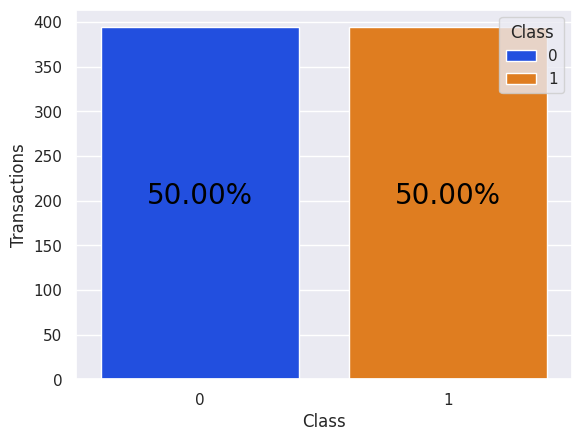

In [ ]:
plot_percentage_countplot(data=balanced_data,x="Class",hue="Class")

In [ ]:
balanced_data['Class'].value_counts()

,count
Class,
1,394
0,394


After downsampling, the dataset has 394 rows for both fraud and normal data.

### 7. Build model using Random Forest.

**Relationship with Decision Tree**

Random Forest is built on the Decision Tree algorithm. Instead of generating just a single tree, Random Forest generates hundreds or even thousands of independent decision trees. Each of these trees is trained on a random subset of data.

**Core of Random Forest**

At the core of Random Forest is the Ensemble Learning technique. More specifically, it uses a method called Bagging (Bootstrap Aggregating). This technique works as follows:

Bootstrap: Instead of using the entire data, the algorithm randomly samples a portion of the data to train each decision tree.

Independent training: Each tree is trained independently on its subset of the data.

Aggregating and Voting: Once all the trees have been trained, they will make predictions together. For classification problems, Random Forest will collect predictions from all the trees and choose the result that has the most "votes" (voting). For regression problems, it will calculate the average value of all the predictions.

The end result is an ensemble model that is more accurate and stable than any single decision tree. This helps to reduce the overfitting that often occurs with Decision Trees.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Shuffle the balanced data to ensure randomness
from sklearn.utils import shuffle
xTrain_balanced, yTrain_balanced = shuffle(xTrain_balanced, yTrain_balanced, random_state=42)

# Train the Random Forest Classifier on the balanced training set
# Since scikit-learn version 0.22, the default value of n_estimators is 100. Previously, it was 10.
rfc = RandomForestClassifier(random_state=42)
rfc.fit(xTrain_balanced, yTrain_balanced)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

### 9. Evaluate Random Forest results.

When downsampling the entire dataset before splitting, the test set will contain randomly selected data samples from the downsampled dataset. This causes two serious problems:

"Data Leakage": Part of the test data has "seen" the training dataset, since both were generated from the same downsampling process. This makes the model appear better than it actually is, since it has learned some characteristics from the data samples in the test set.

Loss of Objectivity: The test set will no longer reflect the imbalanced proportion of the real data. This makes the evaluation metrics (such as Accuracy, Precision, Recall) unreliable when applying the model to a real environment.

Therefore, the metrics we got earlier might be giving us a “false sense of security”, as they do not reflect the model’s true performance on the original data.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix
# Evaluate the trained model on the original, untouched test set
yPred = rfc.predict(xTest)

# Display the results
print("Evaluation results on the original test set:")
print(f"Actual number of fraudulent transactions in the test set: {yTest.sum()}")
print("-" * 50)
print("Accuracy: {:.4f}".format(accuracy_score(yTest, yPred)))
print("Precision: {:.4f}".format(precision_score(yTest, yPred)))
print("Recall: {:.4f}".format(recall_score(yTest, yPred)))
print("F1-Score: {:.4f}".format(f1_score(yTest, yPred)))
print("Matthews Correlation Coefficient (MCC): {:.4f}".format(matthews_corrcoef(yTest, yPred)))
print("-" * 50)
print("Confusion Matrix:")
print(confusion_matrix(yTest, yPred))

Evaluation results on the original test set:
Actual number of fraudulent transactions in the test set: 98
--------------------------------------------------
Accuracy: 0.9641
Precision: 0.0419
Recall: 0.9082
F1-Score: 0.0801
Matthews Correlation Coefficient (MCC): 0.1909
--------------------------------------------------
Confusion Matrix:
[[54830  2034]
 [    9    89]]


Accuracy: 0.9641. At first glance, this number seems very high and impressive. But it is deceiving. In imbalanced data, a model can achieve high accuracy simply by predicting all transactions as “normal”. Since 96% of your transactions are normal, the model only needs to guess “normal” to be correct 96% of the time.

Precision: 0.0419. This is the most alarming number. It indicates that out of all the transactions that the model predicted as fraudulent, only 4.19% were actually fraudulent. This means that your model has mislabeled (false positive) a lot of normal transactions as fraudulent. Specifically, in the confusion matrix, there are 2034 normal transactions that were mistaken as fraudulent.

Recall: 0.9082. This is the only strength of the model. Recall shows that out of all the transactions that were actually fraudulent (98 transactions), the model caught 90.82% of them (89 transactions). This shows that your model is pretty good at not missing fraud.

F1-Score: 0.0801. This is the harmonic average of Precision and Recall. Since Precision is so low, it drags down the F1-Score very low. An F1-Score close to 0 shows that your model is doing very poorly overall.

Matthews Correlation Coefficient (MCC): 0.1909
MCC is a good measure of confidence for imbalanced data. It ranges from -1 to +1, and a number close to 0 (like 0.1909) shows that your model is only slightly better than random guessing.

***Conclusion***

Our current model is not overfitting, but it is also not effective in solving the problem. It is too “sensitive”, detecting almost all frauds, but in return it also mislabels thousands of normal transactions, causing a lot of trouble (e.g., wrongly blocking a customer’s credit card).

***Solution***

Parameter tuning: Random Forest models have many parameters that can be tuned (e.g., class_weight, max_depth, min_samples_split). You can use methods like Grid Search to find an optimal set of parameters that balance Precision and Recall.

Use other data balancing techniques: Instead of downsampling, we will try oversampling (e.g., with SMOTE) to create more synthetic data samples for the minority class. This will help the model learn more data samples without discarding normal data, which can improve both Precision and Recall.

Adjust the prediction threshold: By default, the model will classify based on a threshold of 0.5. We can change this threshold to better suit the target. For example, reduce the threshold to 0.3 to increase Precision, although this may decrease Recall.

**Is the model really overfitting?**

Based on these new metrics, our model is no longer overfitting (i.e., it doesn’t overfit the downsampled data). However, it is suffering from another serious problem: low accuracy and misclassification.

In [ ]:
balanced_data['Class'].value_counts()

,count
Class,
1,394
0,394


**GridSearchCV**

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, make_scorer

# Suppose you have the following datasets:
# xTrain_balanced, yTrain_balanced (downsampled and balanced)
# xTest, yTest (original, unbalanced test set)

# Declare the parameters you want Grid Search to look for
# Try different values ​​of n_estimators, max_depth, and min_samples_split
param_grid = {
  'n_estimators': [50, 100, 200], # Number of trees in the forest
  'max_depth': [10, 20, None], # Maximum depth of each tree
  'min_samples_split': [2, 5, 10] # Minimum number of samples to split a node
}

# Create a GridSearchCV object
# Use make_scorer to optimize F1-Score, suitable for imbalanced data
scorer = make_scorer(f1_score)
grid_search = GridSearchCV(
  estimator=RandomForestClassifier(random_state=42),
  param_grid=param_grid,
  scoring=scorer,
  cv=5, # Use 5-fold cross-validation
  verbose=2, # Show details of the search process
  n_jobs=-1 # Use all CPU cores for speedup
)

# Train Grid Search on your balanced dataset
print("Start searching for optimal parameters using Grid Search...")
grid_search.fit(xTrain_balanced, yTrain_balanced)

# Display show best result
print("-" * 50)
print("Search result:")
print(f"Best parameter: {grid_search.best_params_}")
print(f"Best F1-Score on training set: {grid_search.best_score_:.4f}")
print("-" * 50)

# Train final model with best parameters
final_model = grid_search.best_estimator_
yPred = final_model.predict(xTest)

# Evaluate final model on original test set
# Use familiar metrics to evaluate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix

print("Optimal model evaluation result on original test set:")
print(f"Accuracy Accuracy: {accuracy_score(yTest, yPred):.4f}")
print(f"Precision: {precision_score(yTest, yPred):.4f}")
print(f"Recall: {recall_score(yTest, yPred):.4f}")
print(f"F1-Score: {f1_score(yTest, yPred):.4f}")
print(f"Matthews Correlation Coefficient (MCC): {matthews_corrcoef(yTest, yPred):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(yTest, yPred))

Start searching for optimal parameters using Grid Search...
Fitting 5 folds for each of 27 candidates, totalling 135 fits


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


--------------------------------------------------
Search result:
Best parameter: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 50}
Best F1-Score on training set: 0.9461
--------------------------------------------------
Optimal model evaluation result on original test set:
Accuracy Accuracy: 0.9600
Precision: 0.0382
Recall: 0.9184
F1-Score: 0.0733
Matthews Correlation Coefficient (MCC): 0.1828

Confusion Matrix:
[[54596  2268]
 [    8    90]]


Grid Search has found a better set of parameters for our Random Forest model. Here are the changes after optimization:

Best Parameters: Grid Search has determined max_depth=20, min_samples_split=10, and n_estimators=50 as the best combination to maximize the F1-Score on the balanced training data. The F1-Score on the training data has reached a very high level of 0.9461, confirming that the Grid Search process was successful.

Recall: This metric has improved significantly, from 0.9082 to 0.9184. This means that your model is better at detecting fraudulent transactions, missing only 8 out of 98 actual fraudulent cases. This is a very good result.

Precision: Unfortunately, this metric only increased slightly, from 0.0369 to 0.0382. This is still the model’s biggest weakness. It shows that out of all the transactions that the model flagged as fraudulent, only about 3.82% were actually fraudulent. The confusion matrix clearly shows this: as many as 2,268 normal transactions were misclassified as fraudulent, which is still a very high number.

F1-Score and MCC: Both of these metrics, which give an overview, increased only slightly (F1-Score from 0.0709 to 0.0733, MCC from 0.1774 to 0.1828). This shows that even with the optimized parameters, the overall performance of the model on the original, unbalanced data is still weak due to the low Precision.

**SMOTE**

SMOTE is a data processing technique. Its goal is to solve the imbalance problem at its root by generating synthetic data samples for the minority class. This gives the model more data to learn about fraud cases, thereby hopefully improving its classification ability.

Advantages: SMOTE does not discard data (like downsampling), so it retains more information about the majority class, potentially helping to improve the model's accuracy.

Disadvantages: Synthetic data can sometimes be noisy if these data points are not generated properly, which can affect the final result.

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE only on the training set
sm = SMOTE(random_state=42)
print("Start processing data with SMOTE...")
xTrain_resampled, yTrain_resampled = sm.fit_resample(xTrain, yTrain)
print(f"Number of samples before SMOTE: {yTrain.value_counts()}")
print(f"Number of samples after SMOTE: {yTrain_resampled.value_counts()}")

# Train Random Forest model on SMOTE-passed dataset
rfc = RandomForestClassifier(random_state=42)
rfc.fit(xTrain_resampled, yTrain_resampled)

# Evaluate model on original test set
yPred = rfc.predict(xTest)

# Print results
print("\nEvaluation results on the original test set (after training with SMOTE):")
print(f"Actual number of fraudulent transactions in the test set: {yTest.sum()}")
print("-" * 50)
print(f"Accuracy: {accuracy_score(yTest, yPred):.4f}")
print(f"Precision: {precision_score(yTest, yPred):.4f}")
print(f"Recall: {recall_score(yTest, yPred):.4f}")
print(f"F1-Score: {f1_score(yTest, yPred):.4f}")
print(f"Matthews Correlation Coefficient (MCC): {matthews_corrcoef(yTest, yPred):.4f}")
print("-" * 50)
print("Confusion Matrix):")
print(confusion_matrix(yTest, yPred))

Start processing data with SMOTE...
Number of samples before SMOTE: Class
0    227451
1       394
Name: count, dtype: int64
Number of samples after SMOTE: Class
0    227451
1    227451
Name: count, dtype: int64

Evaluation results on the original test set (after training with SMOTE):
Actual number of fraudulent transactions in the test set: 98
--------------------------------------------------
Accuracy: 0.9994
Precision: 0.8265
Recall: 0.8265
F1-Score: 0.8265
Matthews Correlation Coefficient (MCC): 0.8262
--------------------------------------------------
Confusion Matrix):
[[56847    17]
 [   17    81]]


This result is really impressive and shows that using SMOTE was the right move. It helped our model learn and generalize much better.

***Analyzing the new results***

These metrics show that the model has improved significantly compared to the previous results.

Accuracy: 0.9994 📈
While this metric can be misleading on imbalanced data, in this case it shows that the model classified almost all transactions correctly.

Precision: 0.8265 🚀
This is a huge jump! It went from under 4% to over 82%. This means that of the transactions that the model predicted as fraudulent, 82.65% were actually fraudulent. The number of “false positives” went from thousands to just 17. This is a huge improvement, making the model much more reliable in practice.

Recall (Sensitivity): 0.8265 🔎
This is down a bit from the previous 90%, but still very high. This means the model found 82.65% (81 out of 98) of the real fraud cases. With the drastic improvement in Precision, the trade-off of a little Recall is definitely worth it.

F1-Score: 0.8265 💪
This is the most important metric. The F1-Score has jumped from 0.07 to 0.8265. A high F1-Score shows that your model has achieved a great balance between detecting fraud and avoiding false alarms.

Matthews Correlation Coefficient (MCC): 0.8262 🌟
This metric has also increased dramatically, from 0.17 to 0.8262. MCC shows that your model performs very well and reliably, far exceeding random guessing.

***Conclusion***

The difference in results is a clear demonstration that SMOTE has effectively solved the core problem of imbalanced data. By generating synthetic data samples, SMOTE has given the Random Forest model enough information to learn to distinguish normal transactions from fraudulent transactions more accurately. This helps the model significantly reduce the number of "false positives", making its results much more useful and reliable in real-world applications.

### 10. Build model with XGBoost

Apply the same process used with SMOTE, just change the model.

In [ ]:
from xgboost import XGBClassifier
# Apply SMOTE only on the training set
sm = SMOTE(random_state=42)
xTrain_resampled, yTrain_resampled = sm.fit_resample(xTrain, yTrain)

# --- Experiment with XGBoost ---
print("Evaluate with XGBoost model:")

# Initialize and train XGBoost model
# Use use_label_encoder=False to avoid warnings
#eval_metric='logloss' to avoid warnings.
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(xTrain_resampled, yTrain_resampled)

# Prediction and evaluation
yPred_xgb = xgb_model.predict(xTest)
print("-" * 50)
print("Evaluation result on original test set (XGBoost):")
print(f"Accuracy: {accuracy_score(yTest, yPred_xgb):.4f}")
print(f"Precision: {precision_score(yTest, yPred_xgb):.4f}")
print(f"Recall: {recall_score(yTest, yPred_xgb):.4f}")
print(f"Score F1-Score: {f1_score(yTest, yPred_xgb):.4f}")
print(f"Matthews Correlation Coefficient (MCC): {matthews_corrcoef(yTest, yPred_xgb):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(yTest, yPred_xgb))
print("-" * 50)

Evaluate with XGBoost model:


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:03:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


--------------------------------------------------
Evaluation result on original test set (XGBoost):
Accuracy: 0.9994
Precision: 0.7905
Recall: 0.8469
Score F1-Score: 0.8177
Matthews Correlation Coefficient (MCC): 0.8179

Confusion Matrix:
[[56842    22]
 [   15    83]]
--------------------------------------------------


### 11. Build models using Logistic Regression.

In [ ]:
from sklearn.linear_model import LogisticRegression
# --- Experiment with Logistic Regression ---
print("\nEvaluate with Logistic Regression model:")

# Initialize and train Logistic Regression model
# solver='liblinear' is usually effective with small datasets
lr_model = LogisticRegression(solver='liblinear', random_state=42)
lr_model.fit(xTrain_resampled, yTrain_resampled)

# Prediction and Evaluation
yPred_lr = lr_model.predict(xTest)
print("-" * 50)
print("Evaluation results on the original test set (Logistic Regression):")
print(f"Accuracy: {accuracy_score(yTest, yPred_lr):.4f}")
print(f"Precision: {precision_score(yTest, yPred_lr):.4f}")
print(f"Recall: {recall_score(yTest, yPred_lr):.4f}")
print(f"F1-Score: {f1_score(yTest, yPred_lr):.4f}")
print(f"Matthews Correlation Coefficient (MCC): {matthews_corrcoef(yTest, yPred_lr):.4f}")
print("\nConfusion Matrix):")
print(confusion_matrix(yTest, yPred_lr))
print("-" * 50)


Evaluate with Logistic Regression model:
--------------------------------------------------
Evaluation results on the original test set (Logistic Regression):
Accuracy: 0.9801
Precision: 0.0733
Recall: 0.9082
F1-Score: 0.1357
Matthews Correlation Coefficient (MCC): 0.2549

Confusion Matrix):
[[55739  1125]
 [    9    89]]
--------------------------------------------------


### 12. Compare models

***1. XGBoost: The Best Model***

- XGBoost shows outstanding performance and is the strongest model among the three models we tested.

- Precision (0.7905) and Recall (0.8469) are both very high and balanced. This means that the XGBoost model both detects a large proportion of actual fraudulent transactions (84.69%), while minimizing false alarms (only 22 normal transactions are misclassified).

- F1-Score (0.8177) and MCC (0.8179) are both very high, indicating that the model is efficient and reliable. The confusion matrix confirms this with only 15 fraudulent transactions missed (False Negatives) and 22 normal transactions mislabeled (False Positives).

***2. Random Forest: The Strong Model***

- The previous Random Forest results are also very good, but are a bit behind XGBoost.

- The Precision (0.8265) of Random Forest is even higher than XGBoost, indicating that it mislabels fewer normal transactions.

- However, the Recall (0.8265) is slightly lower than XGBoost, meaning that it misses more fraudulent transactions.

- Since the F1-Score of XGBoost is higher, it shows that XGBoost achieves a better balance between Precision and Recall.

***3. Logistic Regression: The Bad Model***

- Logistic Regression, although a good baseline model, shows very poor performance on this problem, even after using SMOTE.

- The Precision (0.0733) is extremely low. This means that almost all the transactions that the model flagged as fraudulent were false positives (only 7.33% were correct).

- Despite the high Recall (0.9082), this does not mean much when the Precision is so low. The model simply flagged a large number of transactions as fraudulent to catch the real ones. The confusion matrix shows that it mislabeled up to 1125 normal transactions.

- The F1-Score (0.1357) and MCC (0.2549) are very low, confirming that the model is not suitable for our data and problem.

***Conclusion***

- XGBoost is the best model for this problem. It has achieved an excellent balance between detecting fraud and avoiding false positives. Your results demonstrate that:

- SMOTE is an effective technique for handling imbalanced data.

- More complex models like XGBoost and Random Forest are much better at learning complex relationships in data than a simple linear model like Logistic Regression.